# PEA 3306 2020 - Turma 02 - Leb
Primeiro Exercício Computacional - Transformadores (entrega até 03/04/2020)

Um transformador monofásico abaixador de núcleo ferromagnético (suposto linear) possui os seguintes valores
nominais: 250 kVA, 11000/220 V, 60 Hz. São fornecidos os seguintes valores desse transformador:

 Impedâncias dos enrolamentos da alta e da baixa tensão: (1,3+j4,5) $\Omega$ e (0,005+j0,015) $\Omega$, respectivamente.
 Corrente absorvida e potência dissipada em vazio pela baixa tensão: 29 A e 2017 W a 220 V.

Ele deve alimentar uma carga do lado da alta tensão, cujas características são dadas na tabela abaixo.
Neste trabalho, pede-se traçar as curvas características de desempenho desse transformador quando em
carga: Rendimento e Regulação, quando o mesmo opera sob tensão nominal no secundário.

As condições de carga da tabela abaixo deverão ser determinadas de acordo com o antepenúltimo algarismo
do seu número USP (nUSP5).

Este trabalho poderá ser realizado em grupos de no máximo 3 alunos, todos de uma mesma turma de
PEA3306, e, neste caso, o número USP do primeiro aluno, em ordem alfabética, deverá ser o utilizado para a
escolha dos parâmetros. Indique claramente no trabalho os dados usados pelo seu grupo.

Para a realização deste exercício, o aluno deve utilizar um dos seguintes aplicativos, indicando claramente
sua escolha: Octave (preferencialmente), MatLab, Mathematica, SciLab, Planilha Eletrônica (Google Planilha, Excel,
etc).

O trabalho de cada grupo deverá conter:
1. [1,0] apresentação adequada (clareza, concisão, legibilidade, coesão, reprodutibilidade e organização geral do
documento. Usar o “template” do Google Docs disponibilizado no Moodle como modelo.);
2. [1,0] a listagem do programa utilizado amplamente comentada (scripts de Matlab, Octave, SciLab, Mathematica,
etc., ou captura de telas no caso de utilização de planilhas eletrônicas, explicitando os cálculos; 1 PÁGINA);
3. [1,0] tabela com os parâmetros do circuito equivalente do transformador, refletidos aos lados de alta tensão E da
baixa tensão (1 PÁGINA);
4. [1,0] desenho do circuito equivalente completo refletido (referido) ao lado da ALTA tensão, indicando todos os
parâmetros (inclusive a carga e a fonte), e grandezas relevantes, todos com seus valores numéricos e unidades;(1
PÁGINA)
5. [0,5] o desenho do circuito equivalente a fluxo constante refletido ao lado da ALTA tensão, indicando todos os
parâmetros (inclusive a carga e a fonte) e grandezas relevantes, todos com seus valores numéricos e unidades
(ITENS 4 E 5 NA MESMA PÁGINA);
6. [2,0] para o circuito completo (item 4) os gráficos do Rendimento (%) e da Regulação (%) em função do
carregamento do transformador (em % da Potência Nominal), para o cos indicado na tabela abaixo, destacando
o ponto de plena carga em ambos. Para tanto, considerar uma faixa de operação do transformador de 30 a 130%
da plena carga. (1 PÁGINA)
7. [1,0] as mesmas curvas do item 6 para o circuito do item 5, traçadas nos mesmos gráficos do item 6, de modo
a permitir a comparação em ambas situações (utilize marcadores diferentes para cada uma);
8. [2,5] comparação entre os resultados dos itens 6 e 7 e análise, com comentários e conclusões sobre as
características do transformador, modelos adotados e as condições de carga e operação do mesmo (máximo de
300 palavras, na mesma página do gráfico).
 Todos os gráficos devem ser dotados de: título, legendas, unidades e escalas convenientes.
 Todos os símbolos, variáveis e abreviaturas utilizados no texto devem ser reunidos numa lista, com sua devida
descrição, e incluídos na forma de um Anexo, ao final do documento (1 PÁGINA).
 O trabalho deve conter capa e índice, e suas páginas devem ser numeradas. Utilizar a seguinte formatação: fonte
11 Arial, espaçamento 1,5 pt (para texto e tabelas), margens 1,80 cm.
 Embora seja livre a escolha da linguagem utilizada, sugere-se fortemente o uso de scripts Octave/Matlab. Veja a
bibliografia do curso, na aba principal do Moodle, para referências.

**De acordo com o nusp 10694{1}92** 
Carga indutiva, FP = 0,7

# Esquema de ligação Transformador Elevador

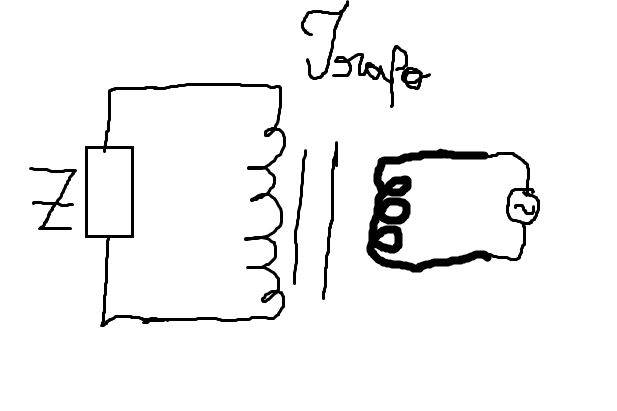

# Circuito da modelagem do Transformador Real Linear


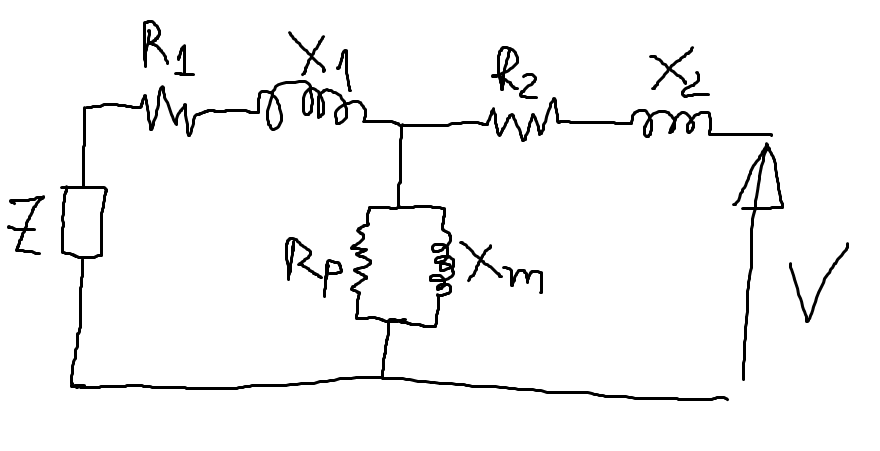

# Determinação de parâmetros do Transformador

Precisamos determinar:
* Perdas no núcleo 
    - Ensaio a vazio no lado da baixa tensão descrito no enunciado
* Perdas nos enrolamentos
    - Dado do enunciado, mas normalmente dimensionado pelo ensaio de curto-circuito via alta tensão

In [389]:
# Definições e funções úteis
import cmath
import numpy as np
import matplotlib.pyplot as plt
K = k = 1000
M = K*K

#Funções para tranalho com números complexos
def phase(x): # em graus
    return ((180/np.pi)*(np.arctan2(x.imag,x.real)))

def modulo(x):
    return np.sqrt(x.real*x.real + x.imag*x.imag)
            
def polar(x,unit):
    print(str(modulo(x)) + "/_" + str(phase(x)) +" "+ unit)
    
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = 180*np.arctan2(y, x)/np.pi
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x + y*1j 

In [102]:
# Escala
k=K=1000

# Placa do Transformador
Sn = 250*k
Va = 11*k
Vb = 220
f  = 60
a = Va/Vb

#Parâmetros dos enrolamentos
R1 = 1.3
R2 = 0.005
X1 = 4.5j
X2 = 0.015j

## 1) Perdas no núcleo: (Ensaio a vazio na BT (Baixa tensão))

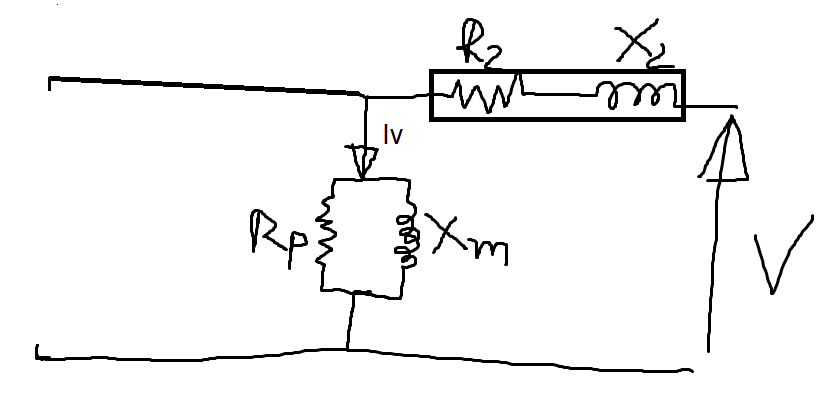

Notamos que nesse caso devemos calcular a queda de potêncial sobre o ramo que contém Xm e Rp. Para isso utilizamos os dados do ensaio à vazio do transformador

* Vb = 220 v
* Ib = 29 A
* P = 2017 W

Para isso é vamos adotar Vb = 220/_ 0

cos(phi) = Vb*Ib.conjugate()/P

phi = /_ Vb - /_ Ib = acos(cos))

/_ Ib = -  phi = - acos(P/Vb*Ib.conjugate())

In [103]:
Pvazio = 2017
Ib_modulo = 29
Ib = pol2cart(29,-1*np.arccos(Pvazio/(Vb*Ib_modulo)))
print("Ib = ", end=" ")
polar(Ib,'A')
print()
V_nucelo = Vb - (R2 + X2)*Ib
print("V_nucelo = ", end=" ")
polar(V_nucelo,'V')
print()
Rp = (V_nucelo*V_nucelo.conjugate())/Pvazio
print("Resistência de perdas no Ferro e histerese = Rp = " + str(Rp) + " ohm")
print()
Xm = (V_nucelo*V_nucelo.conjugate())/(abs(V_nucelo*Ib.conjugate())*np.sin(np.arccos(Pvazio/(Vb*Ib_modulo))))
print("                 Reatância de magnetização = Xm = " + str(Xm) + " ohm")

Ib =  29.0/_-71.57009803927106 A

V_nucelo =  219.54146974105814/_1.0540783192204846e-05 V

Resistência de perdas no Ferro e histerese = Rp = (23.896111520111027+0j) ohm

                 Reatância de magnetização = Xm = (7.979663267965475+0j) ohm


# 3) Circuito referido a alta e a baixa tensão


### Referido a Alta

In [104]:
R1a = R1
X1a = X1
R2_a= (a**2)*R2
X2_a= (a**2)*X2
Xm_a= (a**2)*Xm
Rp_a= (a**2)*Rp
print("Referido a alta tensão")
print()
print("R1 = ", end=" ")
polar(R1a,'ohm')
print("X1 = ", end=" ")
polar(X1a,'ohm')
print("R2' = ", end=" ")
polar(R2_a,'ohm')
print("X2' = ", end=" ")
polar(X2_a,'ohm')
print("Xm' = ", end=" ")
polar(Xm_a,'ohm')
print("Rp' = ", end=" ")
polar(Rp_a,'ohm')

Referido a alta tensão

R1 =  1.3/_0.0 ohm
X1 =  4.5/_90.0 ohm
R2' =  12.5/_0.0 ohm
X2' =  37.5/_90.0 ohm
Xm' =  19949.158169913688/_0.0 ohm
Rp' =  59740.27880027757/_0.0 ohm


### Referido a Baixa

In [105]:
R1_b = R1/(a**2)
X1_b = X1/(a**2)
R2b = R2
X2b = X2
Xmb = Xm
Rpb = Rp
print("Referido a alta tensão")
print()
print("R1 = ", end=" ")
polar(R1_b,'ohm')
print("X1 = ", end=" ")
polar(X1_b,'ohm')
print("R2' = ", end=" ")
polar(R2b,'ohm')
print("X2' = ", end=" ")
polar(X2b,'ohm')
print("Xm' = ", end=" ")
polar(Xmb,'ohm')
print("Rp' = ", end=" ")
polar(Rpb,'ohm')

Referido a alta tensão

R1 =  0.0005200000000000001/_0.0 ohm
X1 =  0.0018/_90.0 ohm
R2' =  0.005/_0.0 ohm
X2' =  0.015/_90.0 ohm
Xm' =  7.979663267965475/_0.0 ohm
Rp' =  23.896111520111027/_0.0 ohm


## 5) Gráficos de Rendimento e Regulação com Circuito Completo referido ao primário



# Regulação (Circuito Completo)
A seguir apresenta-se o equacionamento para o regulamento nesse caso e a seguir repete-se essas equações dentro do código para a execução dos calculos e posterior apresentação gráfica dos resultados.

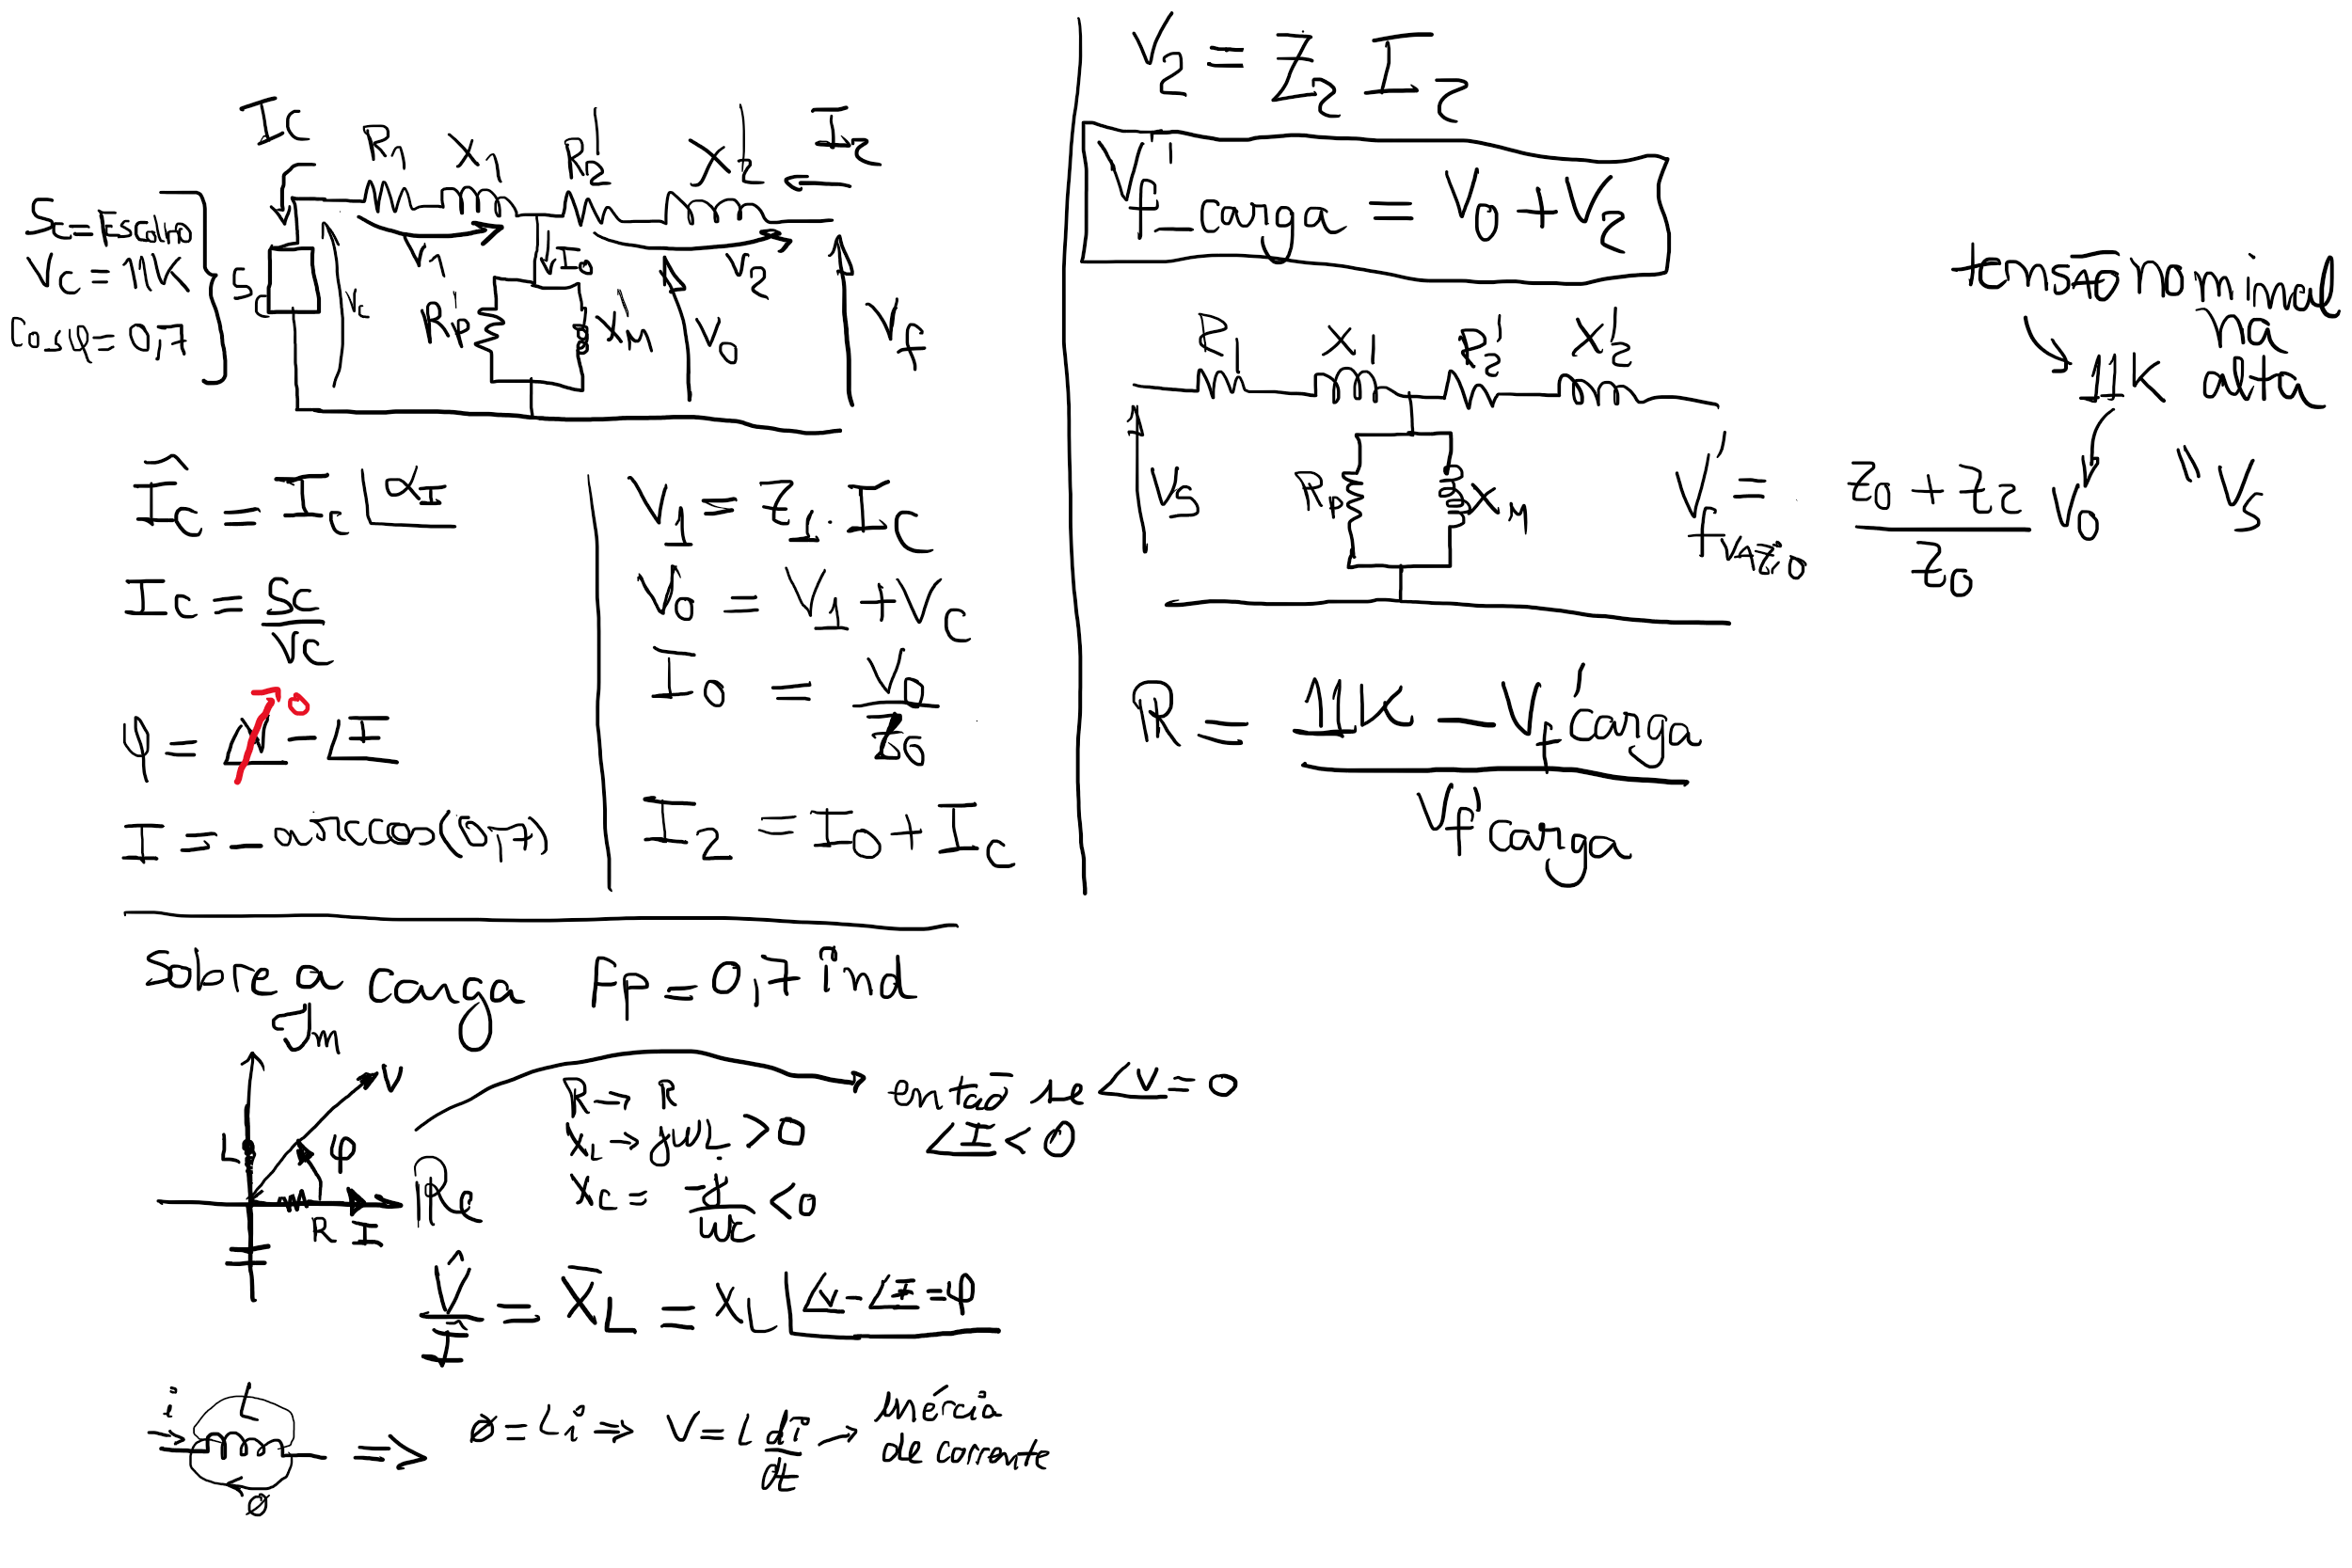

# Rendimento (Circuito Completo)
Com os dados já calculados, mostra-se a formula utilizada e o gráfico associado em função da variação da porcentagem da potência nominal da carga

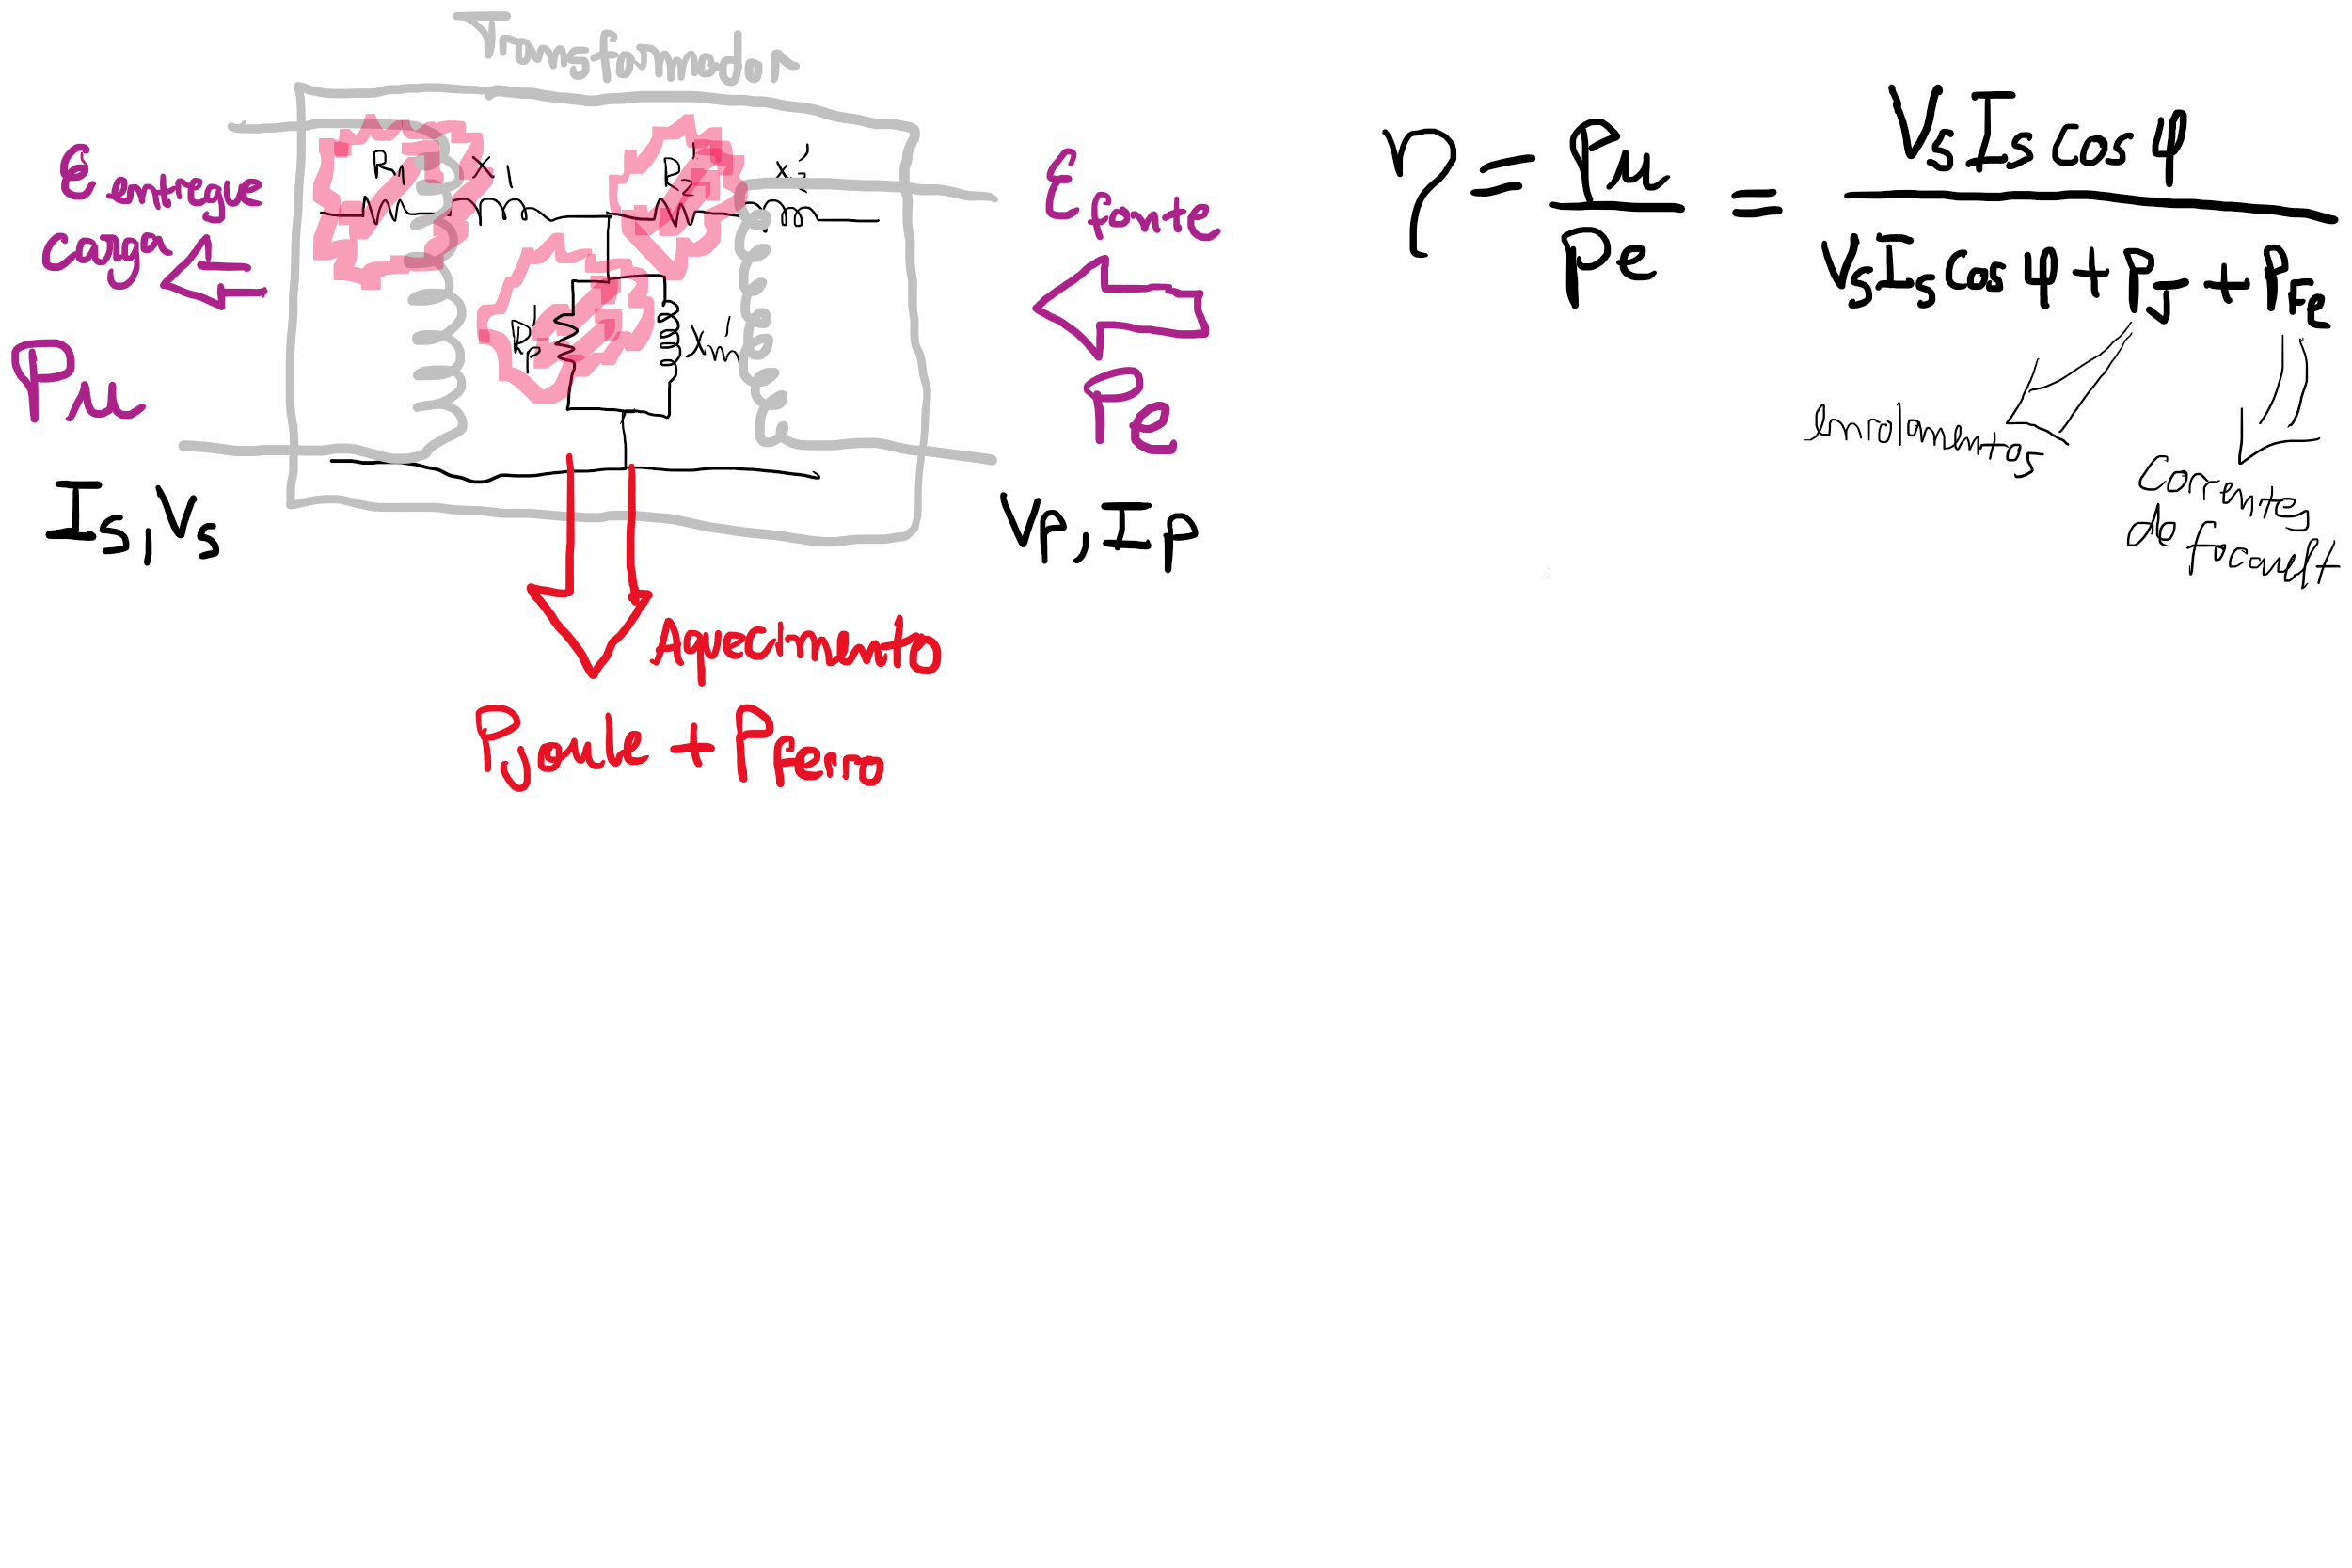

In [216]:
Z1 = X1 + X1
Z2 = R2_a + X2_a
Z0 = (Xm_a*Rp_a)/(Xm_a + Rp_a)
VS = 11*K #é o vc que aprace no equacionamento acima
print(Z1)
print(Z2)
print(Z0)
print(VF)

9j
(12.5+37.5j)
(14955.159883326487+0j)
11000.0


In [391]:
#Calculo do Vetor de regulações e do vetor de Rendimentos [Circuito completo]

#p = np.linspace(0.3,1.3,10)
#p = [0.3 , 0.4 , 0.5 , 0.6 , 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3]
p = np.arange(0.3, 1.3, 0.1)
regulacao = []
rendimento = []
reg_a_cem_porcento = 0
for percentual in p:
 #recebe de 30 até 130%
    SC = 250*k*round(percentual,2)
    IC = SC/VS
    phi = -1*np.arccos(0.7) #Adotou-se VS = !VS! /_0° [V] , assim /_I = - phi
    IC = pol2cart(IC,phi)
    V1 = Z1*IC
    V0 = V1 + VS
    I0 = V0/Z0
    I2 = I0 + IC
    V2 = Z2*I2
    VF_A_VAZIO =VS*(Z0+Z2)/Z0
    VF_EM_CARGA  =  V0 + V2 
    regulacao.append(100*(- abs(VF_A_VAZIO) + abs(VF_EM_CARGA) )/abs(VF_EM_CARGA))
    Pj = abs(R1*IC*IC) + abs(R2_a*I2*I2)
    Pfe = abs((V0**2)/Rp_a)
    rendimento.append((SC*0.7)/(SC*0.7 + Pj + Pfe))
print('Regulação')
print()
print(regulacao)
print()
print('Rendimento')
print()
print(rendimento)

Regulação

[2.5453893121366824, 3.369452442796882, 4.181652464797366, 4.982188577995193, 5.771257835534626, 6.549055026770636, 7.3157725753078235, 8.071600450909802, 8.816726094123657, 9.551334352548148]

Rendimento

[0.9497493377897029, 0.9548308956049187, 0.9564131969955033, 0.9562277720787224, 0.9550326227600996, 0.9532119885476539, 0.9509813542461377, 0.9484708628690125, 0.9457637051309231, 0.9429154978379545]


## 6) Gráficos de Rendimento e Regulação com Circuito a fluxo constantereferido ao primário

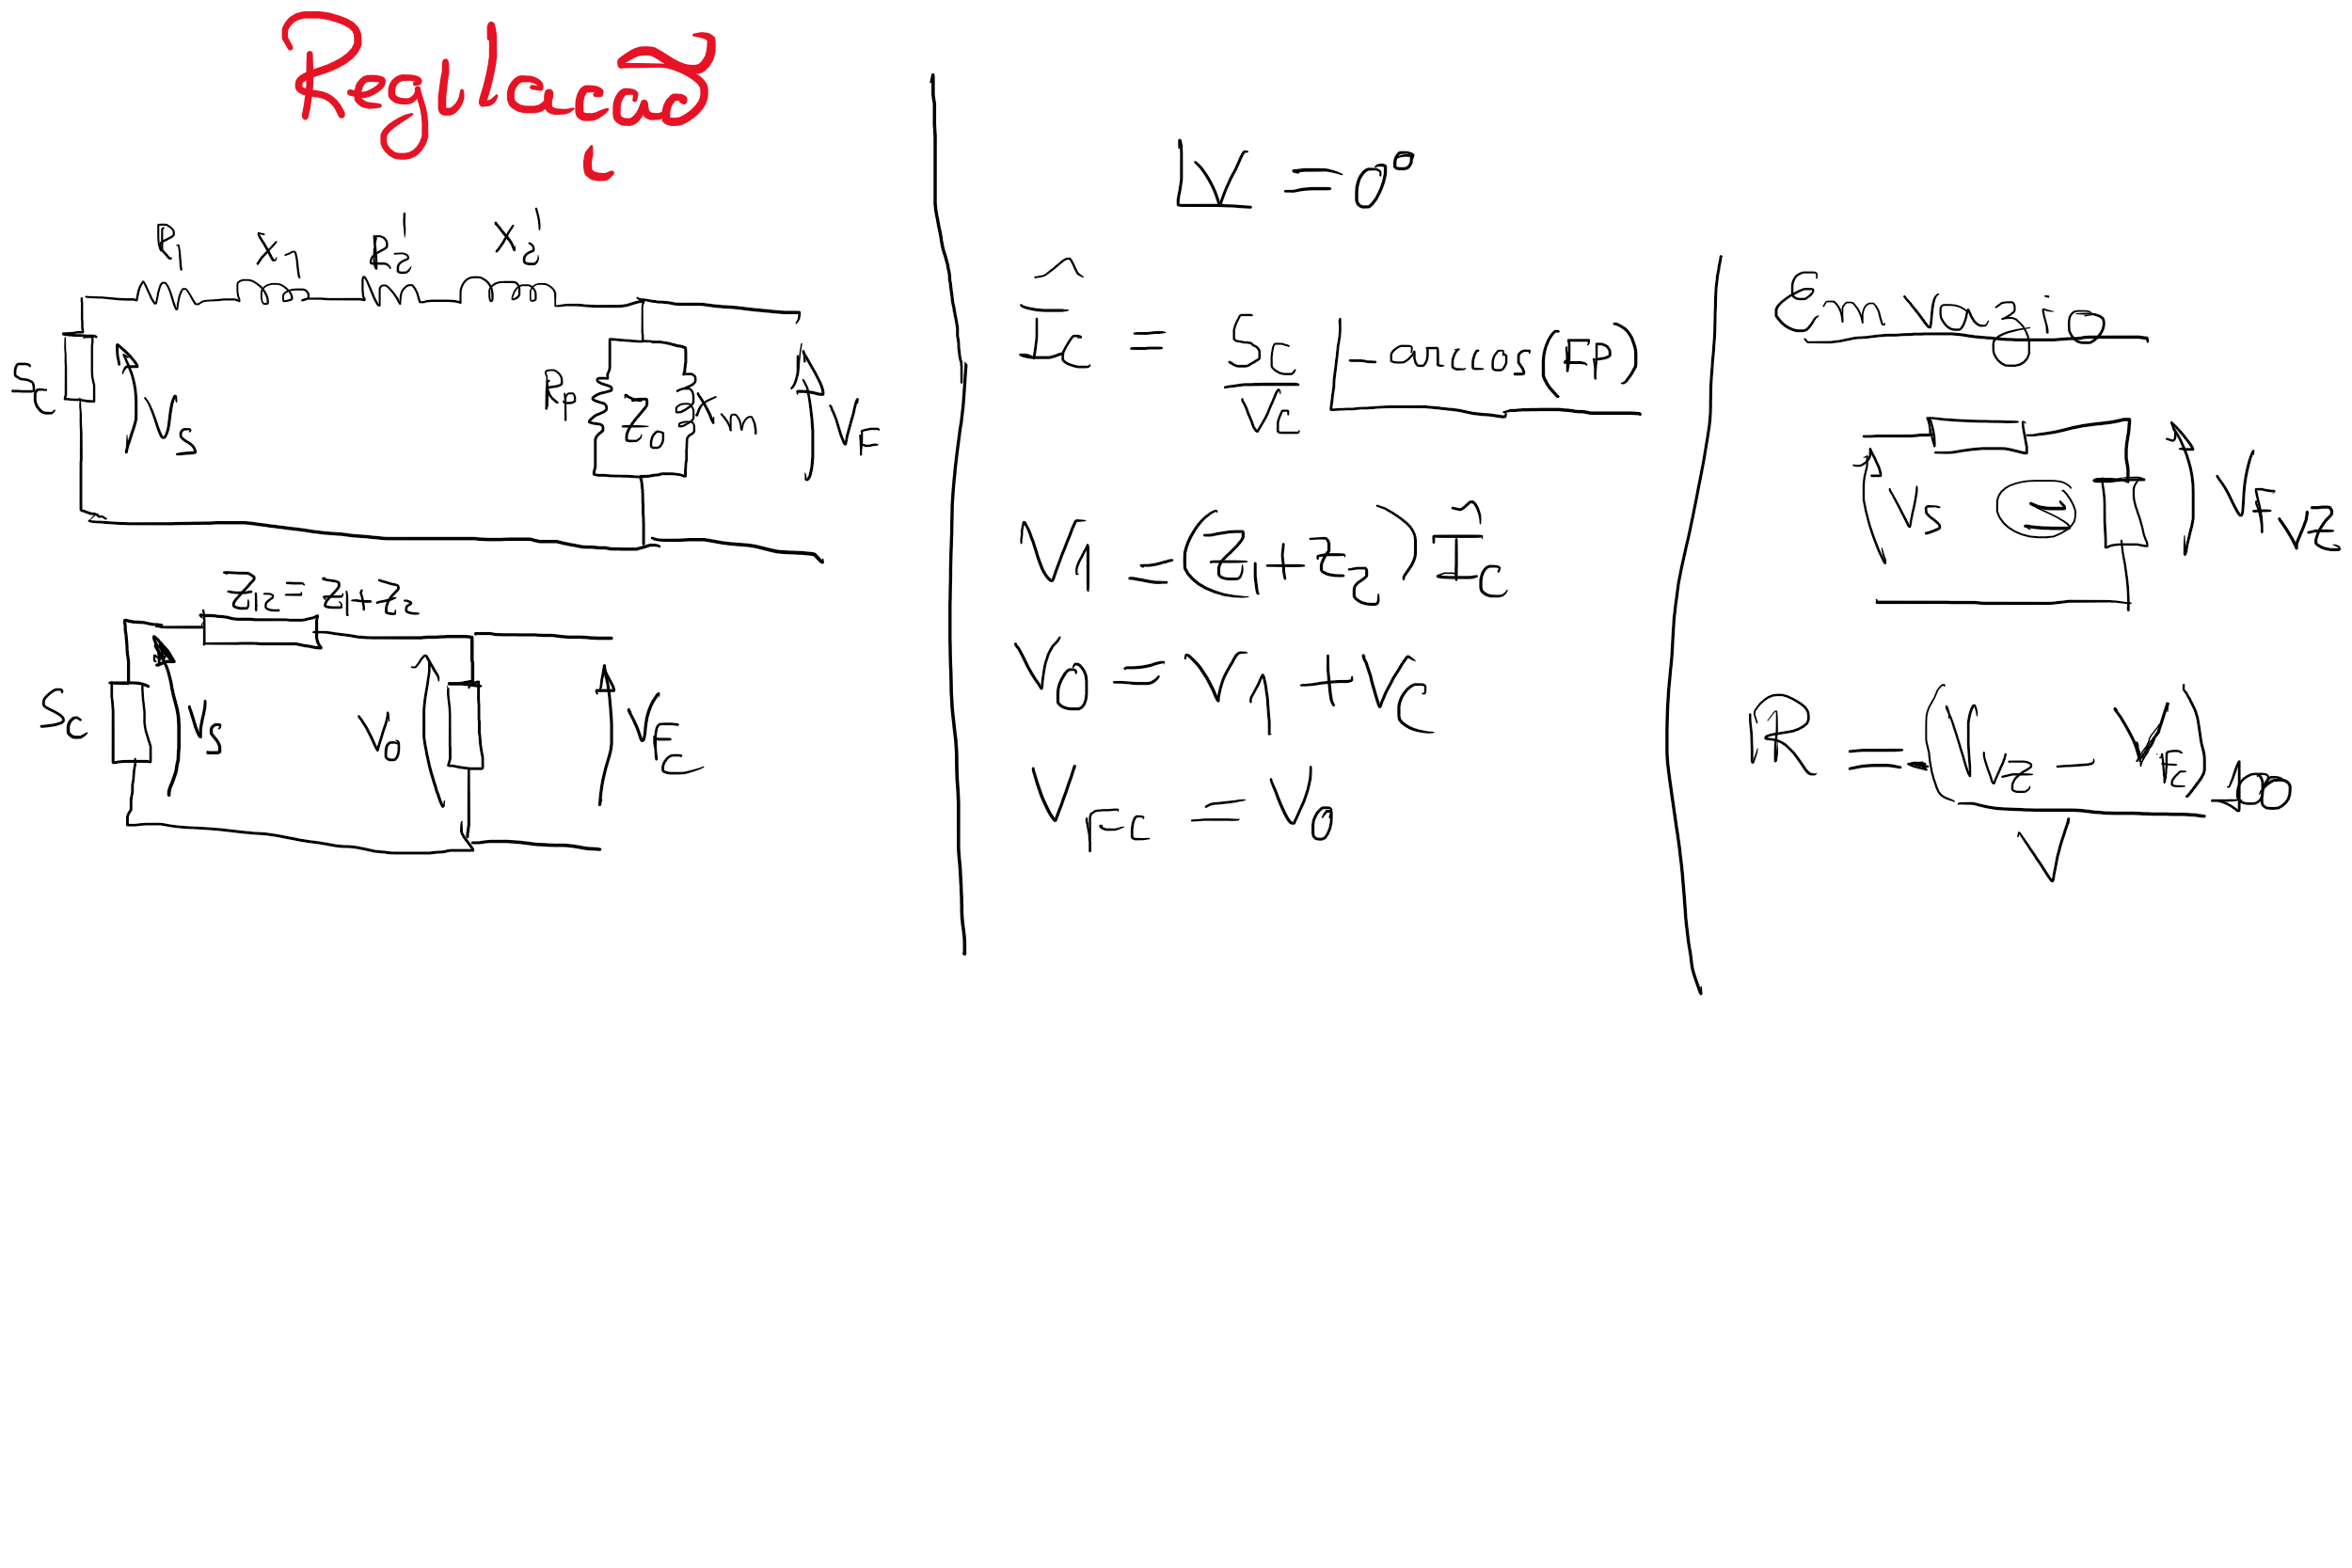

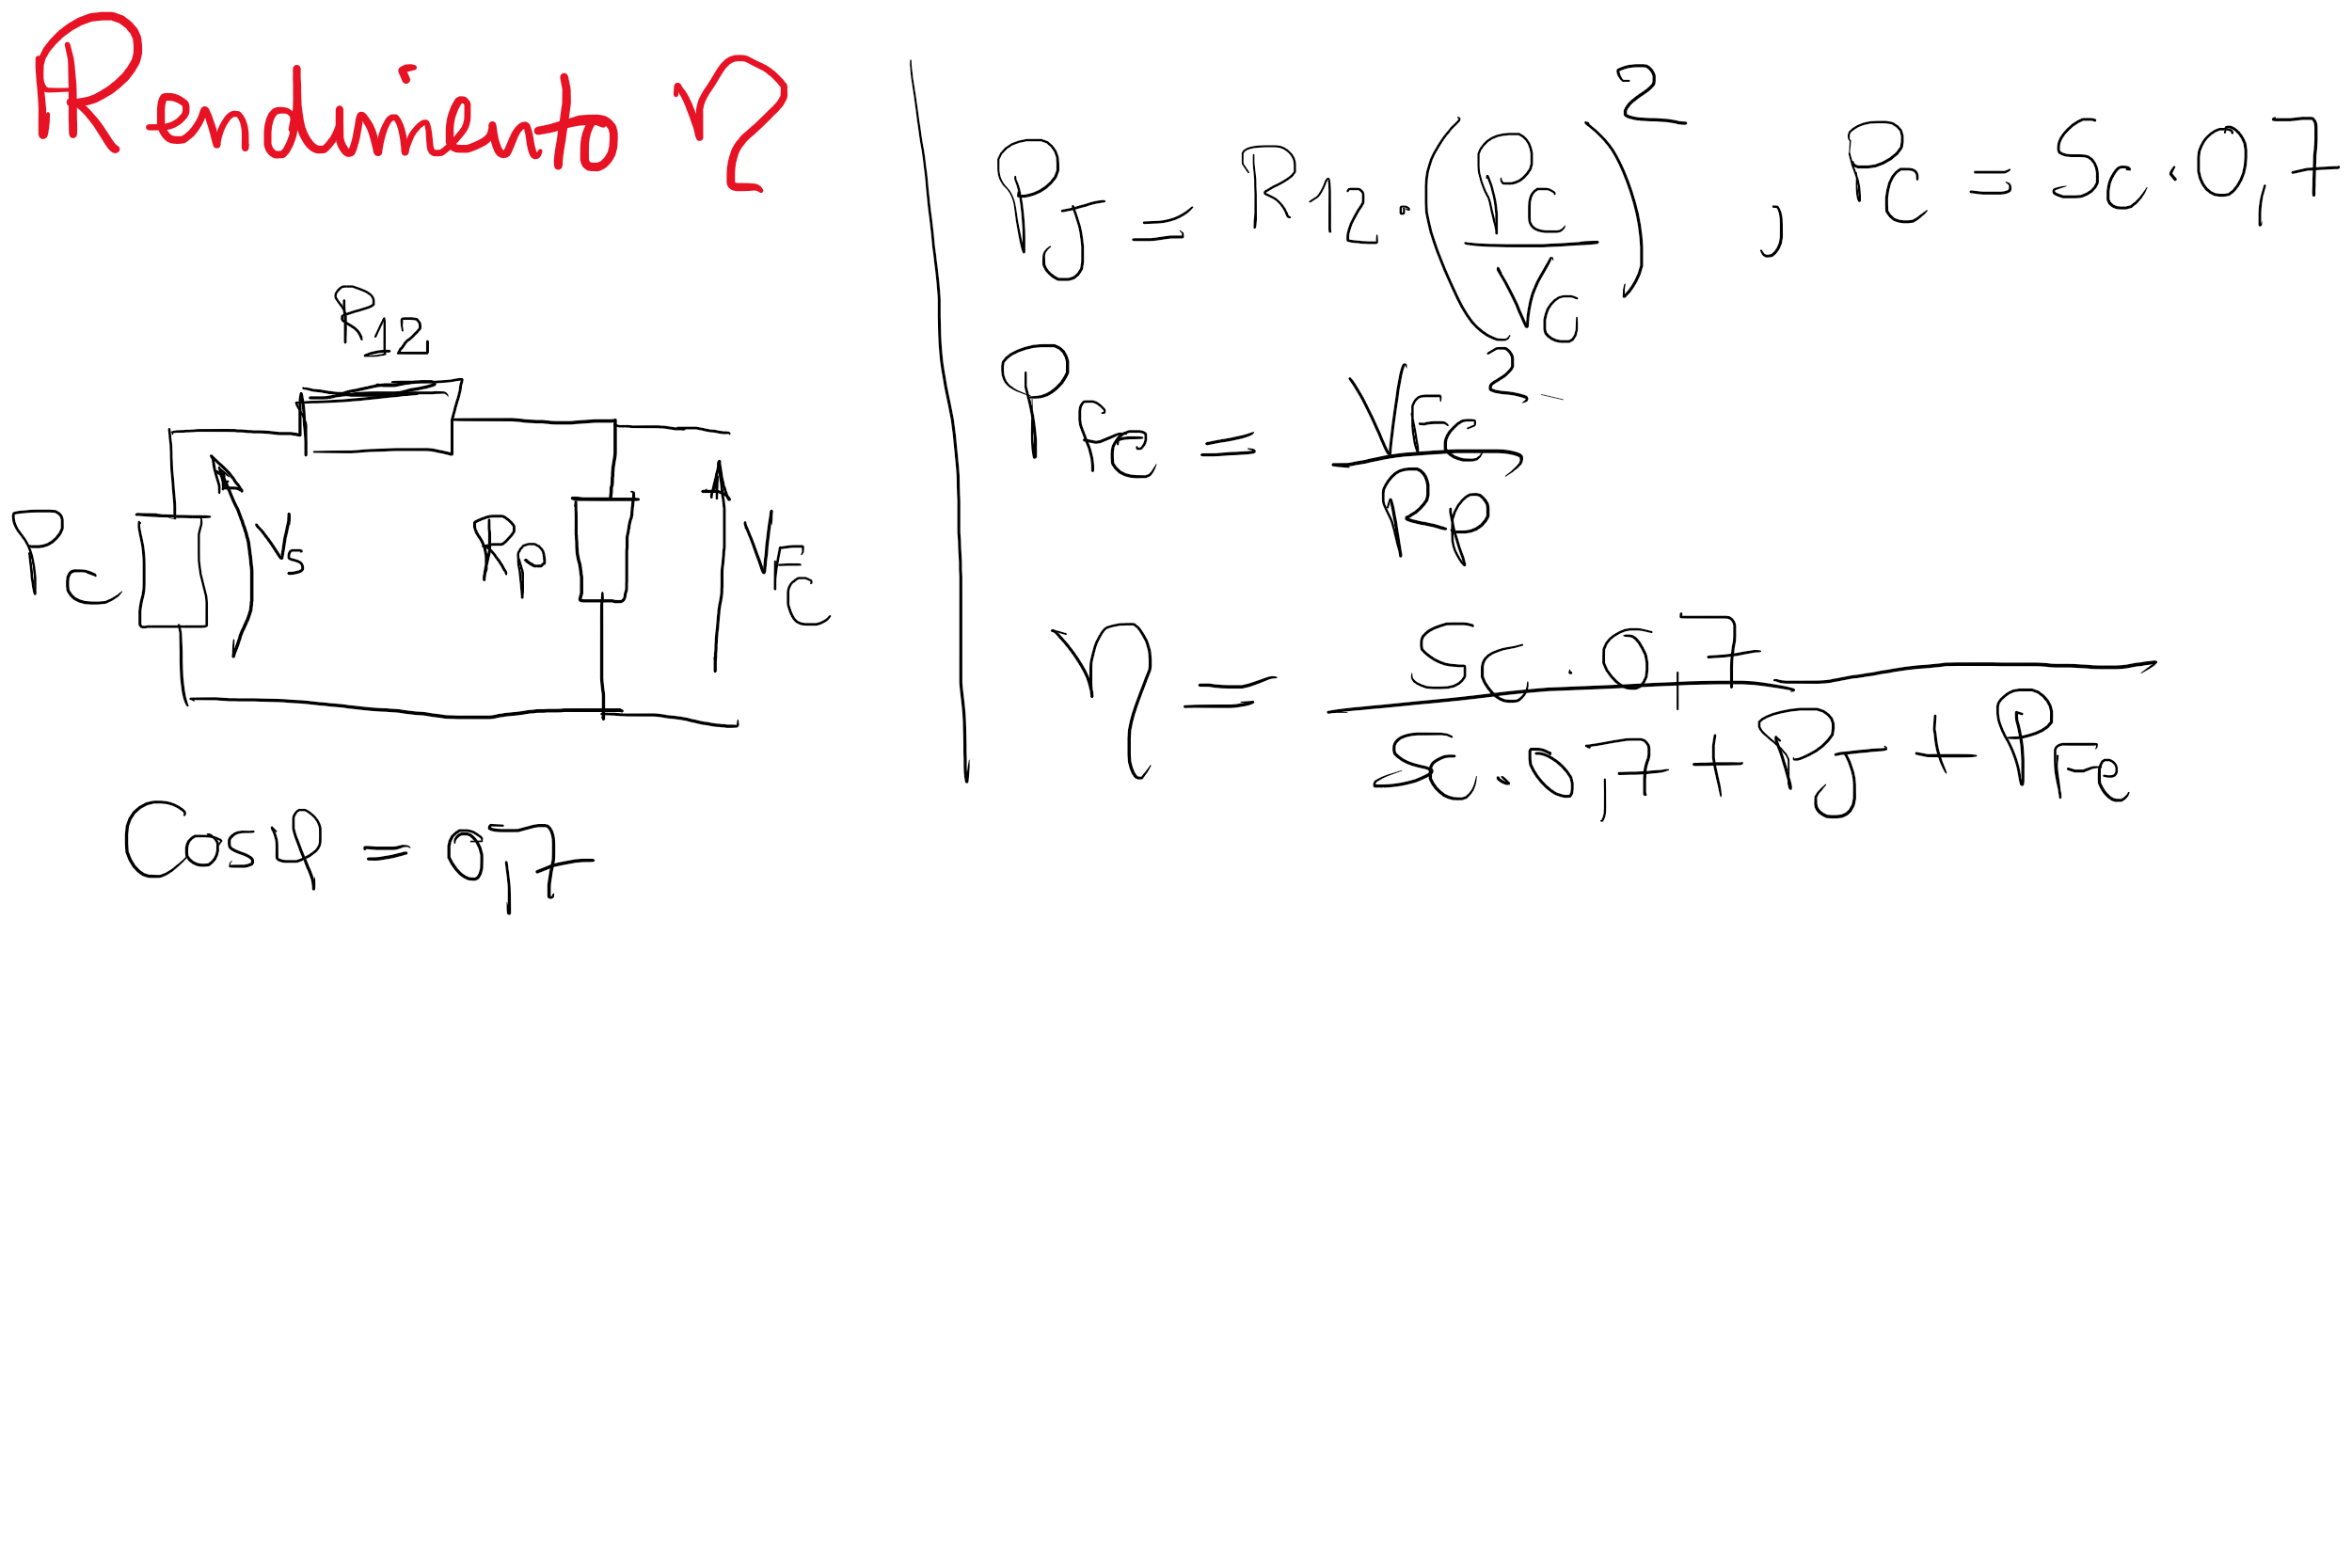

In [392]:
#Calculo do Vetor de regulações e do vetor de Rendimentos [Circuito completo]

Z12 = Z1 + Z2
p = np.arange(0.3, 1.3, 0.1)
regulacaofc = []
rendimentofc = []
reg_a_cem_porcento = 0
for percentual in p:
#recebe de 30 até 130%
    SC = 250*k*round(percentual,2)
    IC = SC/VS
    phi = -1*np.arccos(0.7) #Adotou-se VS = !VS! /_0° [V] , assim /_I = - phi
    IC = pol2cart(IC,phi)
    V1 = (Z1+Z2)*IC
    V0 = V1 + VS
    VF_EM_CARGA = V0
    VF_A_VAZIO = VS
    regulacaofc.append(100*(-abs(VF_A_VAZIO) + abs(VF_EM_CARGA) )/abs(VF_EM_CARGA))
    Pj = abs(((IC)**2)*(R1+R2_a))
    Pfe = abs((V0**2)/Rp_a)
    rendimentofc.append((SC*0.7)/(SC*0.7 + Pj + Pfe))
print('Regulação')
print()
print(regulacaofc)
print()
print('Rendimento')
print()
print(rendimentofc)

Regulação

[2.544683222820232, 3.3685635544264008, 4.180604338446897, 4.981003280796682, 5.769956025987786, 6.547656035327364, 7.314294480480638, 8.070060151142705, 8.81513937565243, 9.549715953466432]

Rendimento

[0.9498116388701647, 0.9548544247107714, 0.9564090185965662, 0.9562017108451946, 0.9549881542952542, 0.9531513779211357, 0.950906178806838, 0.9483822798730165, 0.9456626003530169, 0.9428025734963195]


# Gráficos comparativos: Circuito Completo vs Circuito a fluxo constante

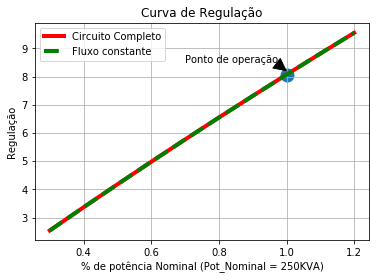

In [387]:
#Regulação

# Circuito completo
plt.plot(p,regulacao,color = 'red',linewidth=4,label="Circuito Completo")
#Fluxo constante
plt.plot(p,regulacaofc,color = 'green',linestyle='dashed',linewidth=4,label="Fluxo constante")

plt.scatter(1,regulacao[7],linewidth=8)
plt.xlabel('% de potência Nominal (Pot_Nominal = 250KVA)')
plt.ylabel('Regulação')
plt.title('Curva de Regulação')
plt.annotate('Ponto de operação', xy=(1, 8.2), xytext=(0.7, 8.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.grid()
plt.legend()


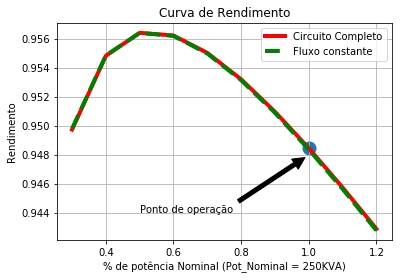

In [395]:
#Rendimento

# Circuito completo
plt.plot(p,rendimento,color = 'red',linewidth=4,label="Circuito Completo")
#Fluxo constante
plt.plot(p,rendimentofc,color = 'green',linestyle='dashed',linewidth=4,label="Fluxo constante")

plt.scatter(1,rendimento[7],linewidth=8)
plt.xlabel('% de potência Nominal (Pot_Nominal = 250KVA)')
plt.ylabel('Rendimento')
plt.title('Curva de Rendimento')
plt.annotate('Ponto de operação', xy=(1, 0.948), xytext=(0.5, 0.944),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.grid()
plt.legend()

# Erros em função do modelo adotado e em função da potência da carga

[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2]
Erro na regulação % médio entre circuito completo e fluxo constante = 0.02 %
Erro no rendimento % médio entre circuito completo e fluxo constante = 0.0 %


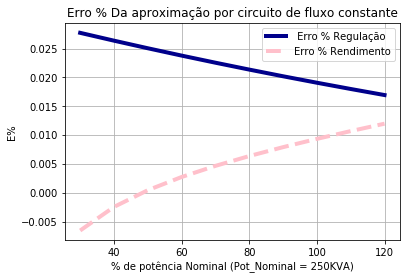

In [419]:
erro_reg = []
erro_rend = []
print(p)
for i in range(10):
    erro_reg.append(100*(regulacao[i] - regulacaofc[i])/regulacao[i])
    erro_rend.append(100*(rendimento[i] - rendimentofc[i])/rendimento[i])
    
    
# Circuito completo
plt.plot(100*p,erro_reg,color = 'darkblue',linewidth=4,label=" Erro % Regulação")
#Fluxo constante
plt.plot(100*p,erro_rend,color = 'pink',linestyle='dashed',linewidth=4,label="Erro % Rendimento")


plt.xlabel('% de potência Nominal (Pot_Nominal = 250KVA)')
plt.ylabel('E%')
plt.title('Erro % Da aproximação por circuito de fluxo constante')

plt.grid()
plt.legend()

print("Erro na regulação % médio entre circuito completo e fluxo constante = " + str(round(np.mean(erro_reg),2)) + " %")
print("Erro no rendimento % médio entre circuito completo e fluxo constante = " + str(round(np.mean(erro_rend),2)) + " %")

# Potêncializando a análise, de -100% até 1000%

In [422]:
#Calculo do Vetor de regulações e do vetor de Rendimentos [Circuito completo] ==================================================

#p = np.linspace(0.3,1.3,10)
#p = [0.3 , 0.4 , 0.5 , 0.6 , 0.7, 0.8, 0.9, 1, 1.1, 1.2, 1.3]
p = np.arange(-1, 10, 0.1)
regulacao = []
rendimento = []
reg_a_cem_porcento = 0
for percentual in p:
 #recebe de 30 até 130%
    SC = 250*k*round(percentual,2)
    IC = SC/VS
    phi = -1*np.arccos(0.7) #Adotou-se VS = !VS! /_0° [V] , assim /_I = - phi
    IC = pol2cart(IC,phi)
    V1 = Z1*IC
    V0 = V1 + VS
    I0 = V0/Z0
    I2 = I0 + IC
    V2 = Z2*I2
    VF_A_VAZIO =VS*(Z0+Z2)/Z0
    VF_EM_CARGA  =  V0 + V2 
    regulacao.append(100*(- abs(VF_A_VAZIO) + abs(VF_EM_CARGA) )/abs(VF_EM_CARGA))
    Pj = abs(R1*IC*IC) + abs(R2_a*I2*I2)
    Pfe = abs((V0**2)/Rp_a)
    rendimento.append((SC*0.7)/(SC*0.7 + Pj + Pfe))
print('Regulação Circuito Completo')
print()
print(regulacao)
print()
print('Rendimento Circuito Completo')
print()
print(rendimento)

#Calculo do Vetor de regulações e do vetor de Rendimentos [Circuito completo]===================================================

Z12 = Z1 + Z2
regulacaofc = []
rendimentofc = []
reg_a_cem_porcento = 0
for percentual in p:
#recebe de 30 até 130%
    SC = 250*k*round(percentual,2)
    IC = SC/VS
    phi = -1*np.arccos(0.7) #Adotou-se VS = !VS! /_0° [V] , assim /_I = - phi
    IC = pol2cart(IC,phi)
    V1 = (Z1+Z2)*IC
    V0 = V1 + VS
    VF_EM_CARGA = V0
    VF_A_VAZIO = VS
    regulacaofc.append(100*(-abs(VF_A_VAZIO) + abs(VF_EM_CARGA) )/abs(VF_EM_CARGA))
    Pj = abs(((IC)**2)*(R1+R2_a))
    Pfe = abs((V0**2)/Rp_a)
    rendimentofc.append((SC*0.7)/(SC*0.7 + Pj + Pfe))
print('Regulação Fluxo Constante')
print()
print(regulacaofc)
print()
print('Rendimento Fluxo Constante')
print()
print(rendimentofc)

Regulação Circuito Completo

[-9.340436170670658, -8.343383770434304, -7.360888941758976, -6.392745054853624, -5.43874395743297, -4.498676454898995, -3.572332747879817, -2.65950283019023, -1.7599768500911146, -0.8735454375456317, 0.0, 0.8608670109476317, 1.7092618597806124, 2.5453893121366824, 3.369452442796882, 4.181652464797366, 4.982188577995193, 5.771257835534626, 6.549055026770636, 7.3157725753078235, 8.071600450909802, 8.816726094123657, 9.551334352548148, 10.275607427753313, 10.989724831932024, 11.69386335343285, 12.388197030387346, 13.07289713170409, 13.748132144757202, 14.414067769148957, 15.07086691597297, 15.71868971204994, 16.357693508648584, 16.988032894242718, 17.609859710891158, 18.223323073860318, 18.828569394139144, 19.42574240352509, 20.014983181985844, 20.596430187025422, 21.17021928480626, 21.736483782799272, 22.295354463753387, 22.846959620793292, 23.391425093471376, 23.92887430461415, 24.45942829781793, 24.983205775461368, 25.500323137114247, 26.01089451823316, 26

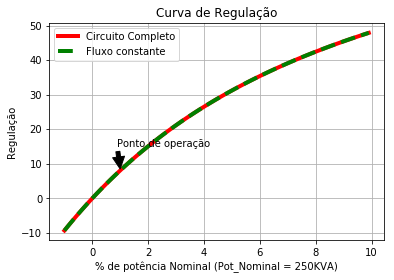

In [430]:
#Regulação

# Circuito completo
plt.plot(p,regulacao,color = 'red',linewidth=4,label="Circuito Completo")
#Fluxo constante
plt.plot(p,regulacaofc,color = 'green',linestyle='dashed',linewidth=4,label="Fluxo constante")

plt.xlabel('% de potência Nominal (Pot_Nominal = 250KVA)')
plt.ylabel('Regulação')
plt.title('Curva de Regulação')
plt.annotate('Ponto de operação', xy=(1, 8.2), xytext=(0.9, 15),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.grid()
plt.legend()

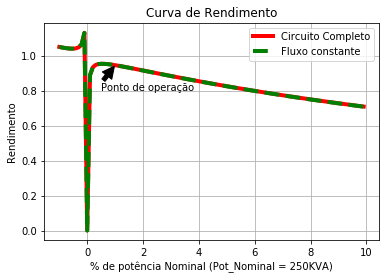

In [431]:
#Rendimento

# Circuito completo
plt.plot(p,rendimento,color = 'red',linewidth=4,label="Circuito Completo")
#Fluxo constante
plt.plot(p,rendimentofc,color = 'green',linestyle='dashed',linewidth=4,label="Fluxo constante")

plt.xlabel('% de potência Nominal (Pot_Nominal = 250KVA)')
plt.ylabel('Rendimento')
plt.title('Curva de Rendimento')
plt.annotate('Ponto de operação', xy=(1, 0.948), xytext=(0.5, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.grid()
plt.legend()

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00  1.10000000e+00  1.20000000e+00  1.30000000e+00
  1.40000000e+00  1.50000000e+00  1.60000000e+00  1.70000000e+00
  1.80000000e+00  1.90000000e+00  2.00000000e+00  2.10000000e+00
  2.20000000e+00  2.30000000e+00  2.40000000e+00  2.50000000e+00
  2.60000000e+00  2.70000000e+00  2.80000000e+00  2.90000000e+00
  3.00000000e+00  3.10000000e+00  3.20000000e+00  3.30000000e+00
  3.40000000e+00  3.50000000e+00  3.60000000e+00  3.70000000e+00
  3.80000000e+00  3.90000000e+00  4.00000000e+00  4.10000000e+00
  4.20000000e+00  4.30000000e+00  4.40000000e+00  4.50000000e+00
  4.60000000e+00  4.70000000e+00  4.80000000e+00  4.90000000e+00
  5.00000000e+00  5.10000

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


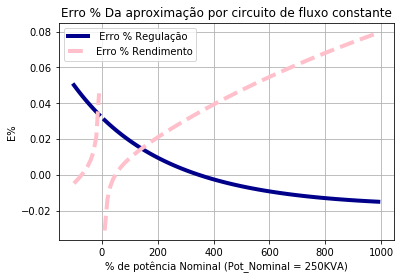

In [434]:
erro_reg = []
erro_rend = []
print(p)
for i in range(110):
    erro_reg.append(100*(regulacao[i] - regulacaofc[i])/regulacao[i])
    erro_rend.append(100*(rendimento[i] - rendimentofc[i])/rendimento[i])
    
    
# Circuito completo
plt.plot(100*p,erro_reg,color = 'darkblue',linewidth=4,label=" Erro % Regulação")
#Fluxo constante
plt.plot(100*p,erro_rend,color = 'pink',linestyle='dashed',linewidth=4,label="Erro % Rendimento")


plt.xlabel('% de potência Nominal (Pot_Nominal = 250KVA)')
plt.ylabel('E%')
plt.title('Erro % Da aproximação por circuito de fluxo constante')

plt.grid()
plt.legend()


- Nessa extrapolação de resultados vemos que a regulação é linear somente na região entorno de 0 a 100% da potência nominal. 

- Vemos ainda, com relação ao rendimento, que a injeção de potência (percentual negativo) leva imediatamente a um rendimento superior a 100% como esperado já que o elemento consumidor (carga) na verdade forncene energia

- O comportamento descontinuo do erro no rendimento é devido a mudança abrupta no rendimento em torno no 0% quando olhamos também valores negativos de potência na carga, isto é, a carga se comportando como fonte